<a href="https://colab.research.google.com/github/LTJ508/Quantum_Computing/blob/main/Qiskit%20Practice/QC%20-%20Part%20-%20A%20-%20Live%20Session/Live_Session_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color="red">Lecture - 04</font>

## Install Package

In [1]:
!pip uninstall qiskit qiskit-aer
!pip install qiskit
!pip install pylatexenc
!pip install qiskit-aer
!pip install qiskit-ibm-runtime
!pip install qiskit-ibm-provider

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 79.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=f0acb91c7ee74a9cef61b623aedf9c1fc23073c07051d3cf2e8509a3533eba82
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 90.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Import Library

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [68]:
from qiskit import *
from qiskit import QuantumCircuit
from qiskit.visualization import plot_state_qsphere, plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit_aer import AerSimulator

from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_provider.job import job_monitor
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit import transpile
import time

import numpy as np
from qiskit.quantum_info import random_statevector
from qiskit.circuit.library import Initialize
from qiskit.result import marginal_counts

## Simple Circuit

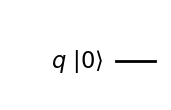

In [4]:
circuit = QuantumCircuit(1)

circuit.draw(output='mpl', initial_state=True)

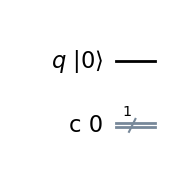

In [5]:
circuit = QuantumCircuit(1, 1)

circuit.draw(output='mpl', initial_state=True)

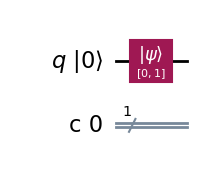

In [6]:
circuit = QuantumCircuit(1, 1)

initial_state = [0, 1]
circuit.initialize(initial_state, 0)

circuit.draw(output='mpl', initial_state=True)

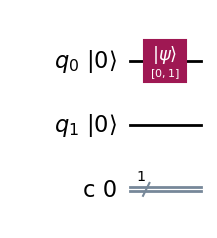

In [15]:
circuit = QuantumCircuit(2, 1)

initial_state = [0, 1]
circuit.initialize(initial_state, 0)

circuit.draw(output='mpl', initial_state=True)

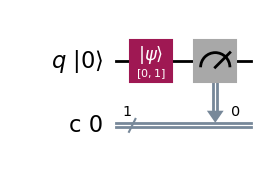

In [7]:
circuit = QuantumCircuit(1, 1)

initial_state = [0, 1]
circuit.initialize(initial_state, 0)

circuit.measure(0, 0)

circuit.draw(output='mpl', initial_state=True)

## Single Quantum Gate

### X Gate / NOT Gate

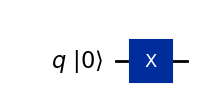

In [16]:
circuit = QuantumCircuit(1)

circuit.x(0)

circuit.draw(output='mpl', initial_state=True)

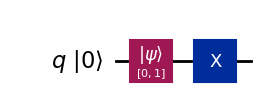

In [17]:
circuit = QuantumCircuit(1)

initial_state = [0, 1]
circuit.initialize(initial_state, 0)

circuit.x(0)

circuit.draw(output='mpl', initial_state=True)

### Hadamard Gate / H

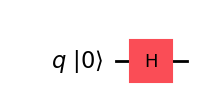

In [18]:
circuit = QuantumCircuit(1)

circuit.h(0)

circuit.draw(output='mpl', initial_state=True)

### Identity Gate / I

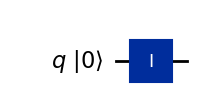

In [19]:
circuit = QuantumCircuit(1)

circuit.id(0)

circuit.draw(output='mpl', initial_state=True)

## Two Qubit Gate

### Control NOT Gate / CNOT

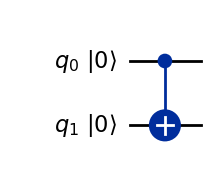

In [20]:
circuit = QuantumCircuit(2)

circuit.cx(0, 1) # (Control, target)

circuit.draw(output='mpl', initial_state=True)

### Swap Gate

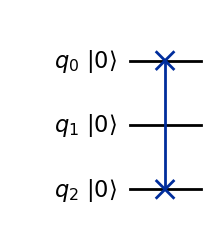

In [22]:
circuit = QuantumCircuit(3)

circuit.swap(0, 2)

circuit.draw(output='mpl', initial_state=True)

## Three Qubit Gate

### Double Controll NOT Gate / CCX

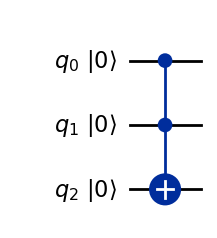

In [23]:
circuit = QuantumCircuit(3)

circuit.ccx(0, 1, 2)

circuit.draw(output='mpl', initial_state=True)

## Simulator Purpose 1: State Vector

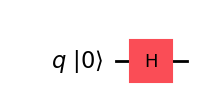

In [35]:
circuit = QuantumCircuit(1)

circuit.h(0)

circuit.draw(output='mpl', initial_state=True)

In [36]:
simulator = AerSimulator()
circuit.save_statevector()
circuit = transpile(circuit, simulator)

#job = simulator.run(circuit)
#job_monitor(job)
#result = job.result()
#final_state = result.get_statevector()

result = simulator.run(circuit).result()
state_vector = result.get_statevector(circuit)

In [37]:
print(state_vector)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


### Visualize the state vector

In [39]:
array_to_latex(state_vector)

<IPython.core.display.Latex object>

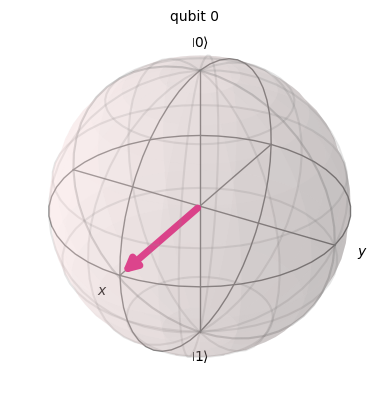

In [40]:
plot_bloch_multivector(state_vector)

## Simulator Purpose 2: Unitary Matrix

### Without applying any gate

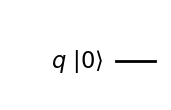

In [46]:
circuit = QuantumCircuit(1)

circuit.draw(initial_state=True, output='mpl')

In [47]:
simulator = AerSimulator()
circuit.save_unitary()
circuit = transpile(circuit, simulator)

#job = simulator.run(circuit)
#job_monitor(job)
#result = job.result()
#final_state = result.get_statevector()

result = simulator.run(circuit).result()
unitary = result.get_unitary(circuit)

In [48]:
print(unitary)
array_to_latex(unitary)

Operator([[1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j]],
         input_dims=(2,), output_dims=(2,))


<IPython.core.display.Latex object>

### Applying Identity Gate

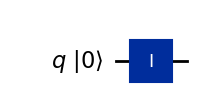

In [50]:
circuit = QuantumCircuit(1)

circuit.id(0)

circuit.draw(initial_state=True, output='mpl')

In [51]:
simulator = AerSimulator()
circuit.save_unitary()
circuit = transpile(circuit, simulator)

#job = simulator.run(circuit)
#job_monitor(job)
#result = job.result()
#final_state = result.get_statevector()

result = simulator.run(circuit).result()
unitary = result.get_unitary(circuit)

In [52]:
print(unitary)
array_to_latex(unitary)

Operator([[1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j]],
         input_dims=(2,), output_dims=(2,))


<IPython.core.display.Latex object>

### Applying a Hadamard Gate

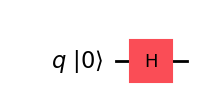

In [53]:
circuit = QuantumCircuit(1)

circuit.h(0)

circuit.draw(initial_state=True, output='mpl')

In [54]:
simulator = AerSimulator()
circuit.save_unitary()
circuit = transpile(circuit, simulator)

#job = simulator.run(circuit)
#job_monitor(job)
#result = job.result()
#final_state = result.get_statevector()

result = simulator.run(circuit).result()
unitary = result.get_unitary(circuit)

In [55]:
print(unitary)
array_to_latex(unitary)

Operator([[ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j],
          [ 0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j]],
         input_dims=(2,), output_dims=(2,))


<IPython.core.display.Latex object>

### Applying two Hadamard Gate

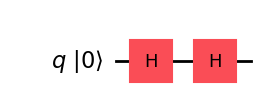

In [56]:
circuit = QuantumCircuit(1)

circuit.h(0)
circuit.h(0)

circuit.draw(initial_state=True, output='mpl')

In [57]:
simulator = AerSimulator()
circuit.save_unitary()
circuit = transpile(circuit, simulator)

#job = simulator.run(circuit)
#job_monitor(job)
#result = job.result()
#final_state = result.get_statevector()

result = simulator.run(circuit).result()
unitary = result.get_unitary(circuit)

In [58]:
print(unitary)
array_to_latex(unitary)

Operator([[1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j]],
         input_dims=(2,), output_dims=(2,))


<IPython.core.display.Latex object>

## Simulator Purpose 3: Results after measurement

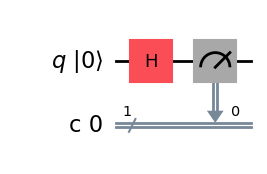

In [63]:
circuit = QuantumCircuit(1, 1)

circuit.h(0)
circuit.measure(0, 0)

circuit.draw(initial_state=True, output='mpl')

In [64]:
simulator = AerSimulator()
circuit = transpile(circuit, simulator)
job = simulator.run(circuit, shots=1000)
job_monitor(job)
result = job.result()
count = result.get_counts()

Job Status: job has successfully run


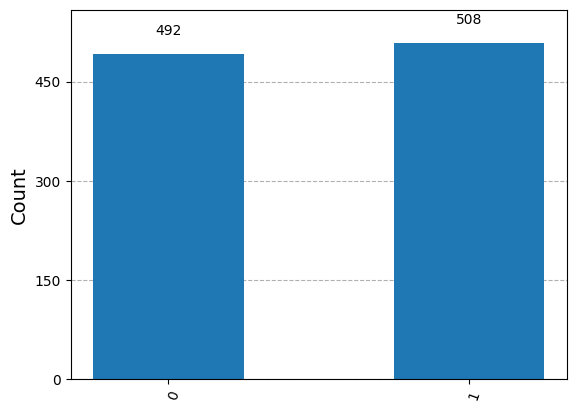

In [65]:
plot_histogram(count)

## Run on Real Quantum Device

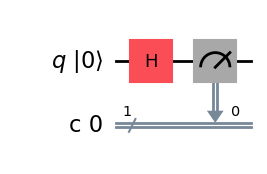

In [67]:
circuit = QuantumCircuit(1, 1)

circuit.h(0)
circuit.measure(0, 0)

circuit.draw(initial_state=True, output='mpl')

In [ ]:
QiskitRuntimeService.save_account(channel="ibm_quantum", token="Your Token", overwrite=True, set_as_default=True)

service = QiskitRuntimeService(channel="ibm_quantum")

backend = service.least_busy(simulator=False, operational=True, min_num_qubits=100)
print("IBM Quantum Device: ", backend)

t_qc = transpile(circuit, backend=backend, optimization_level=3)

job = backend.run(t_qc)
while job.status().name != 'DONE':
    print(f"Job Status: {job.status().name}")
    time.sleep(10)  # Check status every 10 seconds

# Get the result once the job is done
result = job.result()

IBM Quantum Device:  <IBMBackend('ibm_brisbane')>
Job Status: QUEUED
Job Status: QUEUED
Job Status: RUNNING
Job Status: RUNNING
Job Status: RUNNING


In [70]:
print(result)
count = result.get_counts()

Result(backend_name='ibm_brisbane', backend_version='0.0.0', qobj_id='Unknown', job_id='Unknown', success=True, results=[ExperimentResult(shots=4000, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 2000, '0x0': 2000}), header=QobjExperimentHeader(qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4], ['q', 5], ['q', 6], ['q', 7], ['q', 8], ['q', 9], ['q', 10], ['q', 11], ['q', 12], ['q', 13], ['q', 14], ['q', 15], ['q', 16], ['q', 17], ['q', 18], ['q', 19], ['q', 20], ['q', 21], ['q', 22], ['q', 23], ['q', 24], ['q', 25], ['q', 26], ['q', 27], ['q', 28], ['q', 29], ['q', 30], ['q', 31], ['q', 32], ['q', 33], ['q', 34], ['q', 35], ['q', 36], ['q', 37], ['q', 38], ['q', 39], ['q', 40], ['q', 41], ['q', 42], ['q', 43], ['q', 44], ['q', 45], ['q', 46], ['q', 47], ['q', 48], ['q', 49], ['q', 50], ['q', 51], ['q', 52], ['q', 53], ['q', 54], ['q', 55], ['q', 56], ['q', 57], ['q', 58], ['q', 59], ['q', 60], ['q', 61], ['q', 62], ['q', 63], ['q', 64], ['q', 65], ['

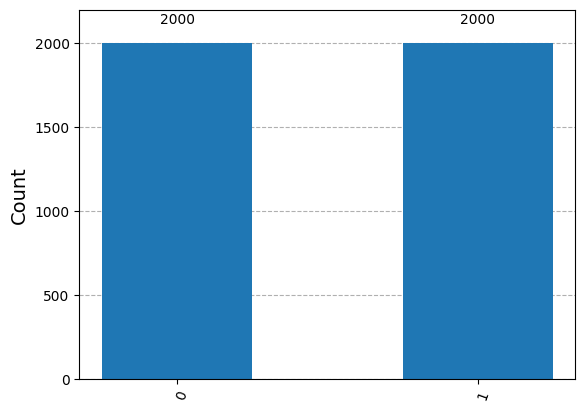

In [71]:
plot_histogram(count)

## Bell State

### Preparing Bell State 1

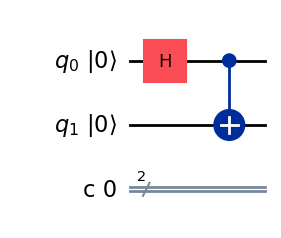

In [73]:
circuit = QuantumCircuit(2, 2)

circuit.h(0)
circuit.cx(0, 1)

circuit.draw(initial_state=True, output='mpl')

In [74]:
simulator = AerSimulator()

circuit.save_statevector()
circuit = transpile(circuit, simulator)

result = simulator.run(circuit).result()
state_vector = result.get_statevector(circuit)

In [75]:
print(state_vector)
array_to_latex(state_vector)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


<IPython.core.display.Latex object>

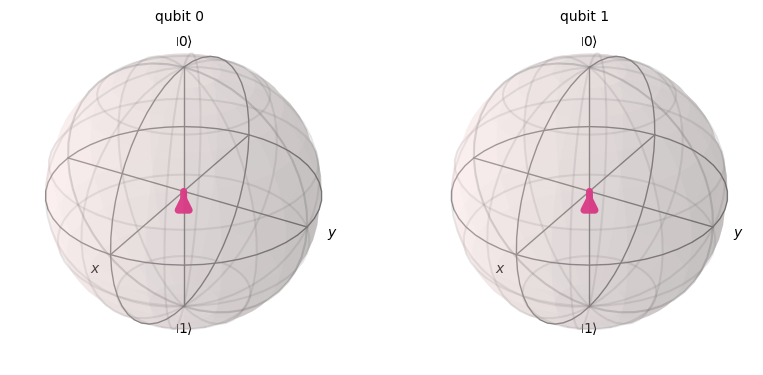

In [76]:
plot_bloch_multivector(state_vector)

### Preparing Bell State 2

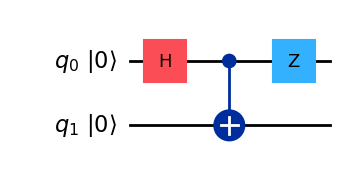

In [77]:
circuit = QuantumCircuit(2)

circuit.h(0)
circuit.cx(0, 1)
circuit.z(0)

circuit.draw(initial_state=True, output='mpl')

In [78]:
simulator = AerSimulator()

circuit.save_statevector()
circuit = transpile(circuit, simulator)

result = simulator.run(circuit).result()
state_vector = result.get_statevector(circuit)

In [79]:
print(state_vector)
array_to_latex(state_vector)

Statevector([ 0.70710678+0.j, -0.        +0.j,  0.        +0.j,
             -0.70710678+0.j],
            dims=(2, 2))


<IPython.core.display.Latex object>

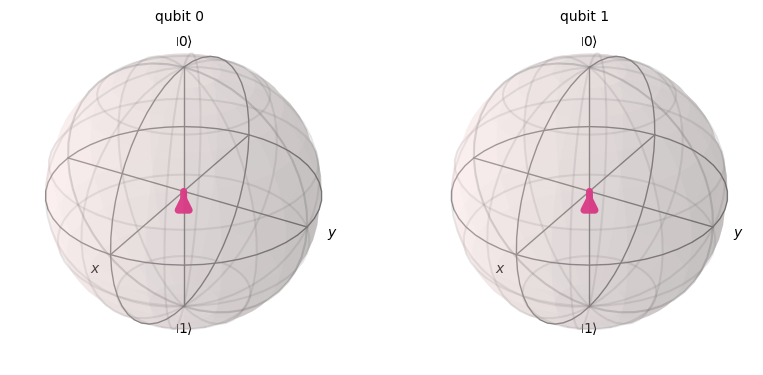

In [80]:
plot_bloch_multivector(state_vector)

# <center><font size="50" color="red">Thank You</font></center>